<a href="https://colab.research.google.com/github/saptarshisarkar20/Stock-Prediction/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


In [2]:
# abcd = len(data)-1
# abcd = int(abcd)
# print(abcd)
for x in range (24) :
  print("data | ")

data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [3]:
# import pandas as pd
# import datetime

# def get_historical_data(symbol,start_date,end_date):
#     ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
#     symbol = symbol.upper()
#     start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
#     end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
#     url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
#     url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
#     col_names = ['Date','Open','High','Low','Close','Volume']
#     stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
#     df = pd.DataFrame(stocks)
#     return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [4]:
# data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

**Step 3:** Write the data to a csv file.

In [5]:
# data.to_csv('google.csv',index = False)

In [6]:
import pandas as pd
import datetime

In [7]:
df = pd.read_csv("/content/DATA/tata.csv")


# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/DATA/tata.csv')
print(data.head())


         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  


In [9]:
df. drop("Last", axis=1, inplace=True)
df. drop("Turnover (Lacs)", axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Total Trade Quantity
0,2018-10-08,208.00,222.25,206.85,215.15,4642146.0
1,2018-10-05,217.00,218.60,205.90,209.20,3519515.0
2,2018-10-04,223.50,227.80,216.15,218.20,1728786.0
3,2018-10-03,230.00,237.50,225.75,227.60,1708590.0
4,2018-10-01,234.55,234.60,221.05,230.90,1534749.0


In [10]:
df.rename(columns={'Total Trade Quantity': 'Volume'}, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-10-08,208.00,222.25,206.85,215.15,4642146.0
1,2018-10-05,217.00,218.60,205.90,209.20,3519515.0
2,2018-10-04,223.50,227.80,216.15,218.20,1728786.0
3,2018-10-03,230.00,237.50,225.75,227.60,1708590.0
4,2018-10-01,234.55,234.60,221.05,230.90,1534749.0


In [11]:
data = df
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))



Open   --- mean : 168.95485829959523   	 Std:  51.478291213631614   	 Max:  327.7   	 Min:  103.0
High   --- mean : 171.42906882591095   	 Std:  52.41552680790226   	 Max:  328.75   	 Min:  104.6
Low    --- mean : 166.40230769230757   	 Std:  50.52245214543648   	 Max:  321.65   	 Min:  100.0
Close  --- mean : 168.73105263157888   	 Std:  51.524055162908354   	 Max:  325.75   	 Min:  102.65
Volume --- mean : 2604151.1400809716   	 Std:  2276105.6169295763   	 Max:  29191015.0   	 Min:  100180.0


In [12]:
# abcd = len(data)-1
# abcd = int(abcd)
# print(abcd)
for x in range (24) :
  print("data | ")

data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 
data | 


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [13]:
import pandas as pd

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data


def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    open = []
    close = []
    volume = []
    # data = list(data)
    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range((len(data) - 1), -1, -1):
        item.append(i_counter)
        open.append(data['Open'][i])
        close.append(data['Close'][i])
        volume.append(data['Volume'][i])
        i_counter += 1

    # Create a data frame for stock data
    stocks = pd.DataFrame()

    # Add factors to data frame
    stocks['Item'] = item
    stocks['Open'] = open
    stocks['Close'] = pd.to_numeric(close)
    stocks['Volume'] = pd.to_numeric(volume)

    # return new formatted data
    return stocks



In [14]:
# import preprocess_data as ppd
stocks = remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close     Volume
0     0  157.00  155.80  1720413.0
1     1  155.70  155.55  2049580.0
2     2  156.00  160.15  3124853.0
3     3  161.15  160.05  1880046.0
4     4  160.85  159.45  1281419.0
---
      Item    Open   Close     Volume
1230  1230  234.55  230.90  1534749.0
1231  1231  230.00  227.60  1708590.0
1232  1232  223.50  218.20  1728786.0
1233  1233  217.00  209.20  3519515.0
1234  1234  208.00  215.15  4642146.0


**Step 2: ** Visualise raw data.

In [15]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)


def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x


def plot_basic(stocks, title='TATA Trading', y_label='Price INR', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()


def plot_prediction(actual, prediction, title='TATA Trading vs Prediction', y_label='Price INR', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')

    plt.show()


def plot_lstm_prediction(actual, prediction, title='TATA Trading vs Prediction', y_label='Price INR', x_label='Trading Days'):
    """
    Plots train, test and prediction
    :param actual: DataFrame containing actual data
    :param prediction: DataFrame containing predicted values
    :param title:  Title of the plot
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()



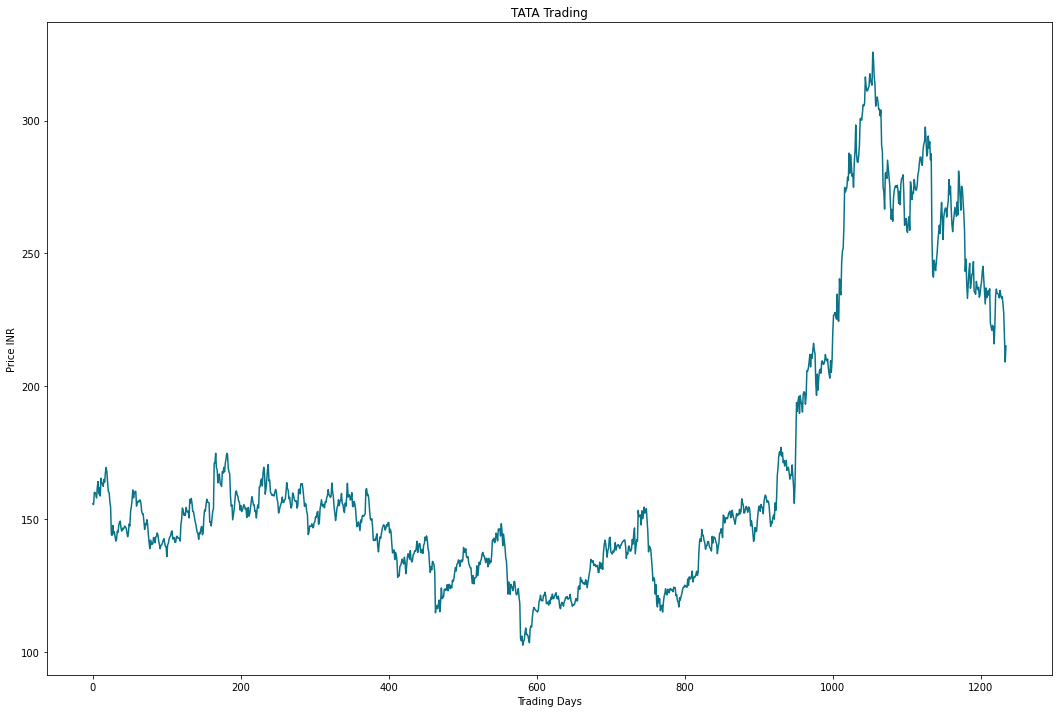

In [16]:
# import visualize
# visualize.plot_basic(stocks)
plot_basic(stocks)


**Step 3 :** Normalise the data using minmaxscaler function

In [17]:
stocks = get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.240320  0.238234  0.055696
1     1  0.234535  0.237113  0.067011
2     2  0.235870  0.257732  0.103973
3     3  0.258789  0.257284  0.061183
4     4  0.257454  0.254594  0.040605


Open   --- mean : 0.2935240689790616   	 Std:  0.2290978692195447   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.2961947675104388   	 Std:  0.23094601148771113   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.08607422716058073   	 Std:  0.0782413298528411   	 Max:  1.0000000000000002   	 Min:  0.0


**Step 4 :** Visualize the data again

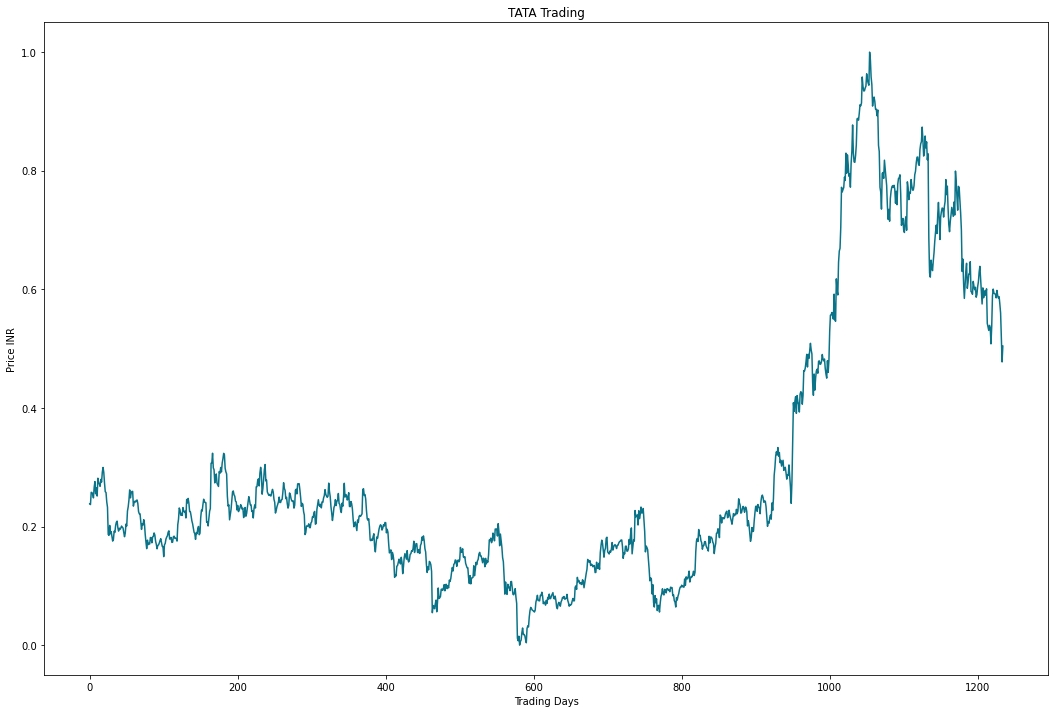

In [18]:
plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

In [19]:
stocks.to_csv('/content/DATA/tata_prepeocessed.csv',index= False)

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [20]:
import numpy as np
import math


def scale_range(x, input_range, target_range):
    """

    Rescale a numpy array from input to target range
    :param x: data to scale
    :param input_range: optional input range for data: default 0.0:1.0
    :param target_range: optional target range for data: default 0.0:1.0
    :return: rescaled array, incoming range [min,max]
    """

    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range


def train_test_split_linear_regression(stocks):
    """
        Split the data set into training and testing feature for Linear Regression Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
        :return: label_range: scaled range of label used in predicting price,
    """
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    for index, row in stocks.iterrows():
        # print([np.array(row['Item'])])
        feature.append([(row['Item'])])
        label.append([(row['Close'])])

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .315
    split = int(math.floor(len(stocks['Item']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range


def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):
    """
        Split the data set into training and testing feature for Long Short Term Memory Model
        :param stocks: whole data set containing ['Open','Close','Volume'] features
        :param prediction_time: no of days
        :param test_data_size: size of test data to be used
        :param unroll_length: how long a window should be used for train test split
        :return: X_train : training sets of feature
        :return: X_test : test sets of feature
        :return: y_train: training sets of label
        :return: y_test: test sets of label
    """
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].values
    y_train = stocks[prediction_time:-test_data_cut]['Close'].values

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].values
    y_test = stocks[prediction_time - test_data_cut:]['Close'].values

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)




In [21]:
from sklearn import linear_model
import numpy as np


def build_model(X, y):
    """
    build a linear regression model using sklearn.linear_model
    :param X: Feature dataset
    :param y: label dataset
    :return: a linear regression model
    """
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod


def predict_prices(model, x, label_range):
    """
    Predict the label for given test sets
    :param model: a linear regression model
    :param x: testing features
    :param label_range: normalised range of label data
    :return: predicted labels for given features
    """
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()




In [22]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# import visualize as vs
# import stock_data as sd
# import LinearRegressionModel

stocks = pd.read_csv('/content/DATA/tata_prepeocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.240320,0.238234,0.055696
1,1,0.234535,0.237113,0.067011
2,2,0.235870,0.257732,0.103973
3,3,0.258789,0.257284,0.061183
4,4,0.257454,0.254594,0.040605


**Step 2:** Split data into train and test pair

In [23]:
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (846, 1)
y_train (846, 1)
x_test (389, 1)
y_test (389, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [24]:
model = build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [25]:
predictions = predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

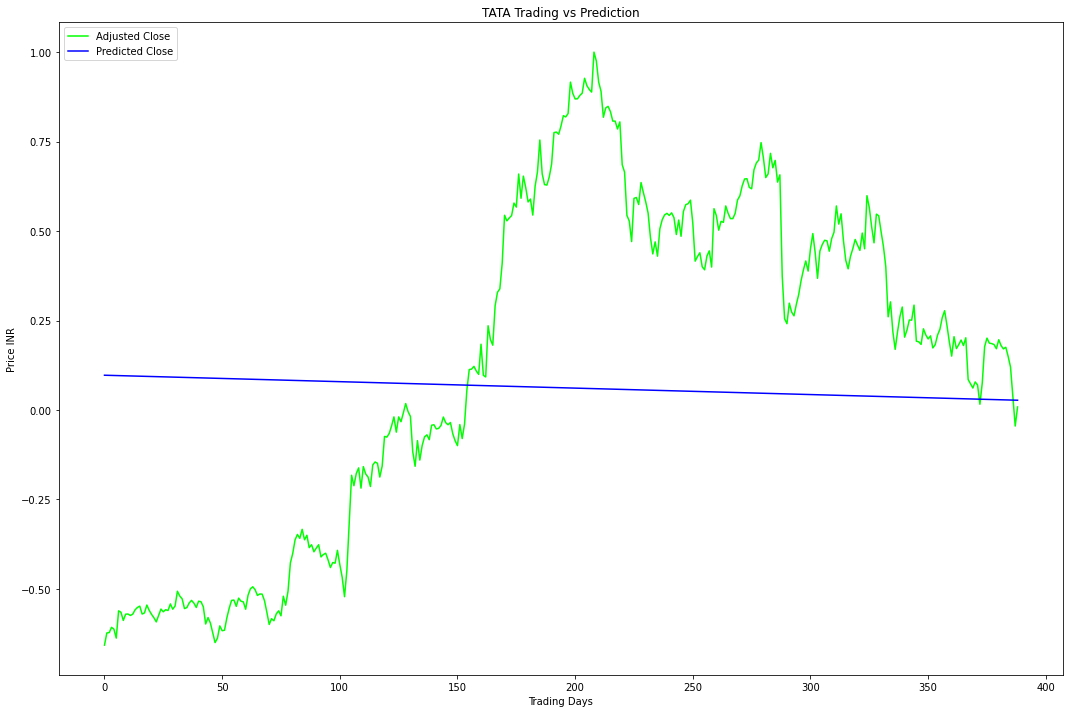

In [26]:
plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [27]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.3581 MSE (0.5984 RMSE)
Test Score: 0.24073144 MSE (0.49064391 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [28]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dropout(0.2))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model


def build_basic_model(input_dim, output_dim, return_sequences):
    """
    Builds a basic lstm model 
    :param input_dim: input dimension of the model
    :param output_dim: output dimension of the model
    :param return_sequences: return sequence of the model
    :return: a basic lstm model with 3 layers.
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        100,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model




In [29]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import  time #helper libraries

# import visualize as vs
# import stock_data as sd
# import LinearRegressionModel

stocks = pd.read_csv('/content/DATA/tata_prepeocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())
display(stocks.head())

,Open,Close,Volume
0,0.240320,0.238234,0.055696
1,0.234535,0.237113,0.067011
2,0.235870,0.257732,0.103973
3,0.258789,0.257284,0.061183
4,0.257454,0.254594,0.040605


,Item,Open,Close,Volume
0,0,0.240320,0.238234,0.055696
1,1,0.234535,0.237113,0.067011
2,2,0.235870,0.257732,0.103973
3,3,0.258789,0.257284,0.061183
4,4,0.257454,0.254594,0.040605


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [30]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)
# train_test_split_linear_regression(stocks)


unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (679, 50, 3)
y_train (679,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [31]:
# build basic lstm model
model = build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.008490324020385742


**Step 4:** Train the model

In [32]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

21/21 [==============================] - 9s 169ms/step - loss: 0.0047 - val_loss: 7.9130e-04


**Step 5:** make prediction using test data

In [33]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

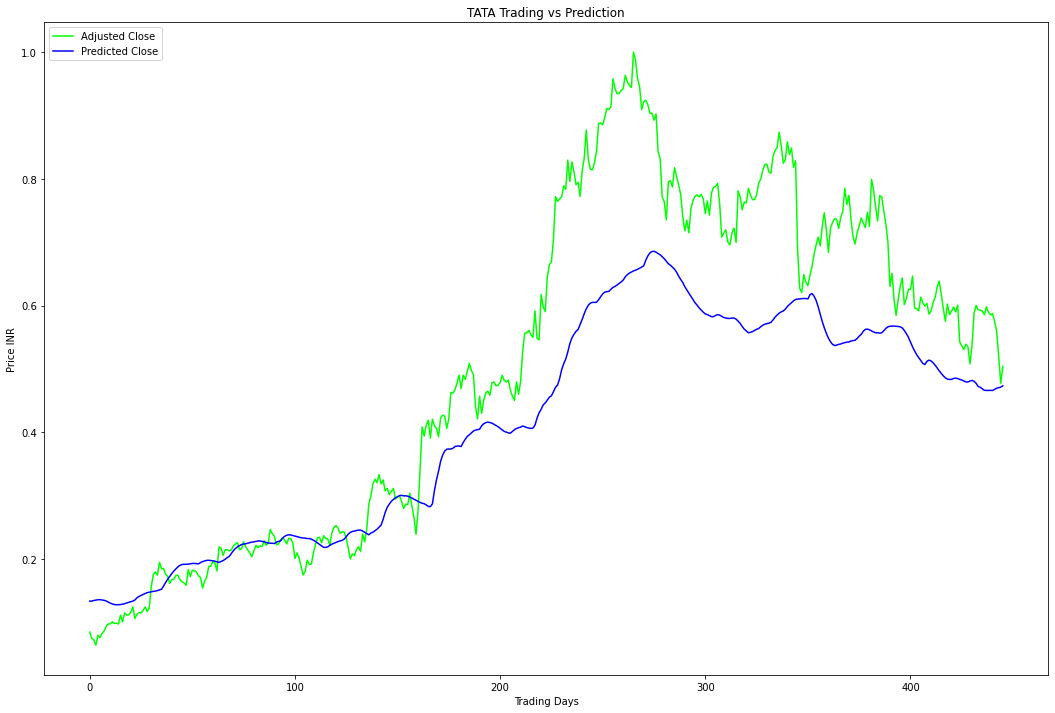

In [34]:
plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [35]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00181769 MSE (0.04263433 RMSE)
Test Score: 0.01955572 MSE (0.13984177 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [36]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.004203319549560547


**Step 2: ** Train improved LSTM model

In [37]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
7/7 - 8s - loss: 0.0099 - val_loss: 0.0011 - 8s/epoch - 1s/step
Epoch 2/5
7/7 - 2s - loss: 0.0023 - val_loss: 9.6999e-04 - 2s/epoch - 237ms/step
Epoch 3/5
7/7 - 2s - loss: 0.0019 - val_loss: 6.4284e-04 - 2s/epoch - 237ms/step
Epoch 4/5
7/7 - 2s - loss: 0.0016 - val_loss: 1.1526e-04 - 2s/epoch - 231ms/step
Epoch 5/5
7/7 - 2s - loss: 0.0015 - val_loss: 1.6008e-04 - 2s/epoch - 236ms/step


**Step 3:** Make prediction on improved LSTM model

In [38]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

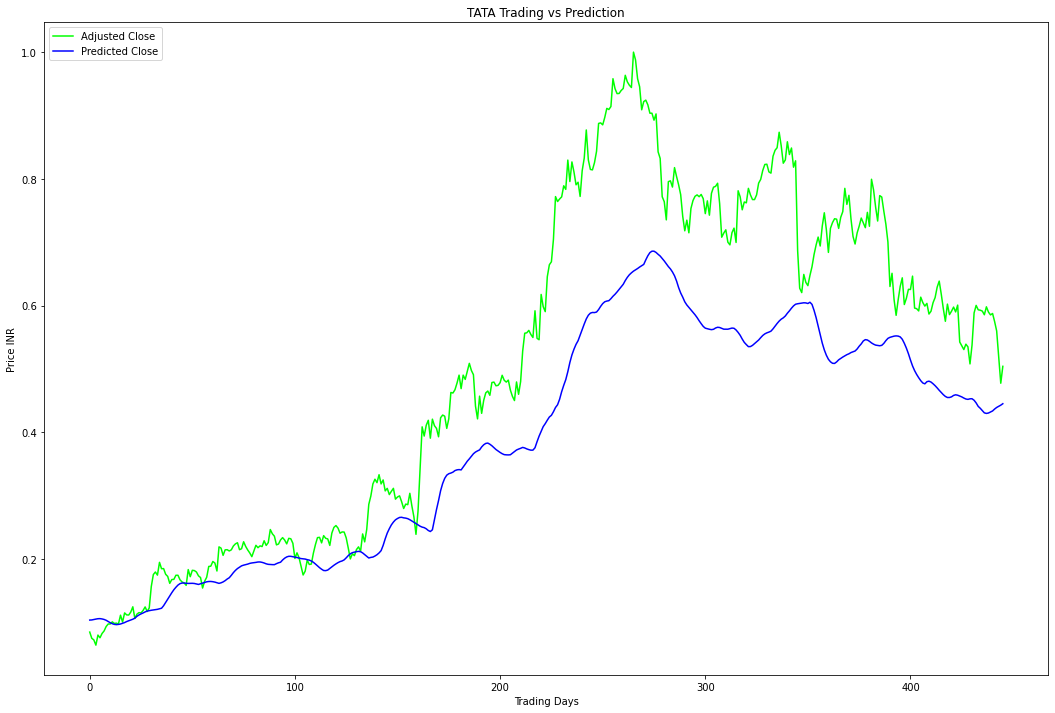

In [39]:
plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [40]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00119526 MSE (0.03457260 RMSE)
Test Score: 0.02426015 MSE (0.15575670 RMSE)


In [41]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.024260 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [43]:
# # import preprocess_data as ppd

# data = pd.read_csv('/content/DATA/googl.csv')

# stocks = remove_data(data)

# stocks = get_normalised_data(stocks)

# stocks = stocks.drop(['Item'], axis = 1)
# #Print the dataframe head and tail
# print(stocks.head())

# X = stocks[:].values()
# Y = stocks[:]['Close'].values()

# X = unroll(X,1)
# Y = Y[-X.shape[0]:]

# print(X.shape)
# print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

# #get the test score
# testScore = model.evaluate(X, Y, verbose=0)
# print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

In [45]:
for i in range (20):
  print("abcd")

TypeError: ignored